In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
import scikit_posthocs as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('SalePrice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [7]:
df['GarageFinish'].isnull().sum()

81

In [8]:
df['GarageFinish'] = df['GarageFinish'].fillna(value=df['GarageFinish'].mode()[0])

<Axes: xlabel='GarageFinish', ylabel='count'>

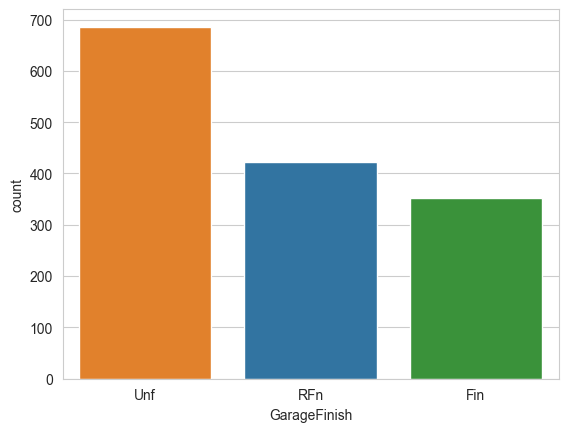

In [9]:
sns.countplot(x='GarageFinish', data=df, hue='GarageFinish', order=df['GarageFinish'].value_counts().index)

In [10]:
fin = df[df['GarageFinish'] == 'Fin']['SalePrice']
rfn = df[df['GarageFinish'] == 'RFn']['SalePrice']
unf = df[df['GarageFinish'] == 'Unf']['SalePrice']


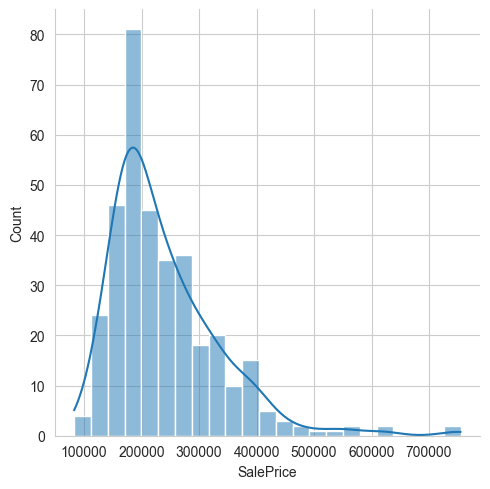

In [11]:
sns.displot(fin, kde=True)

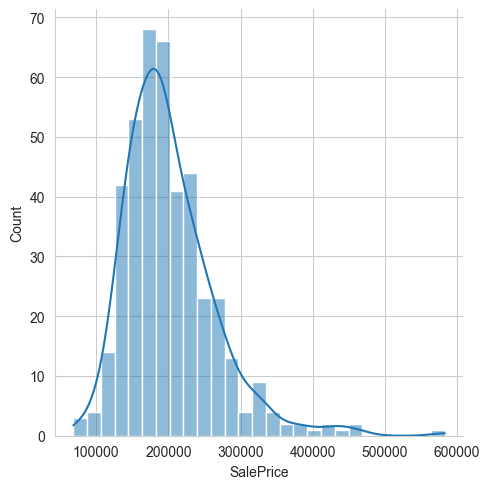

In [12]:
sns.displot(rfn, kde=True)

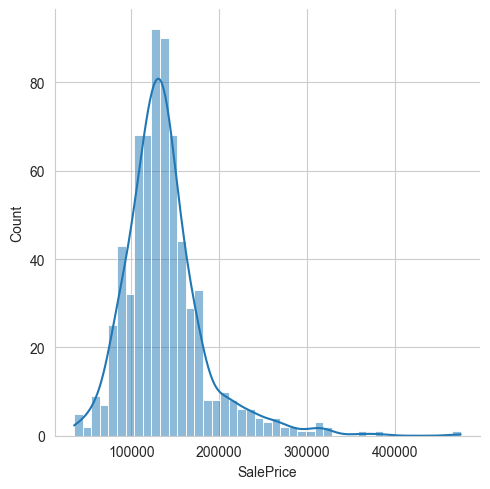

In [13]:
sns.displot(unf, kde=True)

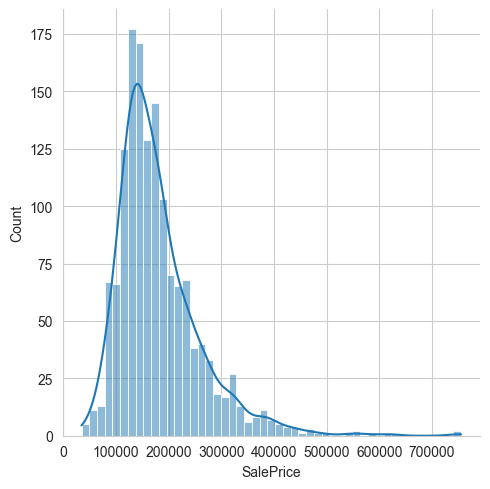

In [14]:
sns.displot(df['SalePrice'], kde=True)

In [15]:
f_statistic, p_value = kruskal(fin, rfn, unf)
print(f"f statistic = {f_statistic}\np value = {p_value}")

f statistic = 578.9156013019641
p value = 1.9501788108972876e-126


In [16]:
if p_value < 0.05:
    print("Significant difference found. Proceed to post-hoc test.")
else:
    print("No significant difference found. No need for post-hoc test.")

Significant difference found. Proceed to post-hoc test.


In [17]:
# Perform Dunn's test 
dunn_test = sp.posthoc_dunn(df,val_col='SalePrice',group_col='GarageFinish')
print(dunn_test)

               Fin           RFn            Unf
Fin   1.000000e+00  5.078670e-05  1.306462e-101
RFn   5.078670e-05  1.000000e+00   4.587568e-72
Unf  1.306462e-101  4.587568e-72   1.000000e+00


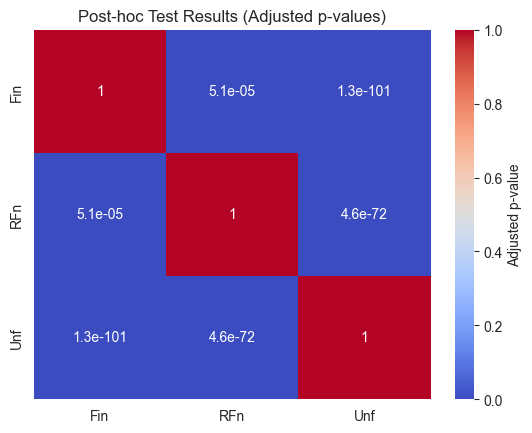

In [18]:
# Heatmap of the Dunn's test results
sns.heatmap(dunn_test, annot=True, cmap="coolwarm", cbar_kws={'label': 'Adjusted p-value'})
plt.title('Post-hoc Test Results (Adjusted p-values)')
plt.show()

## linear regression model

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

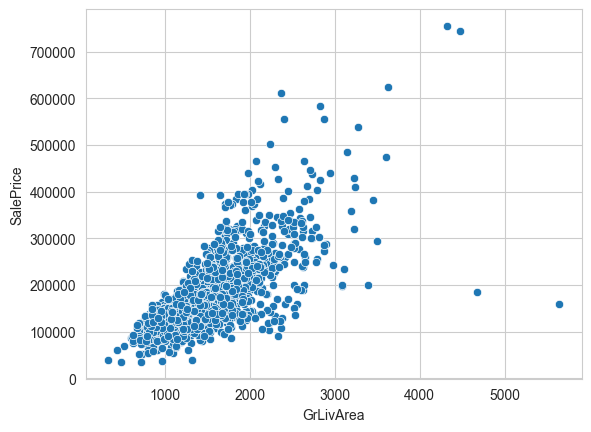

In [19]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

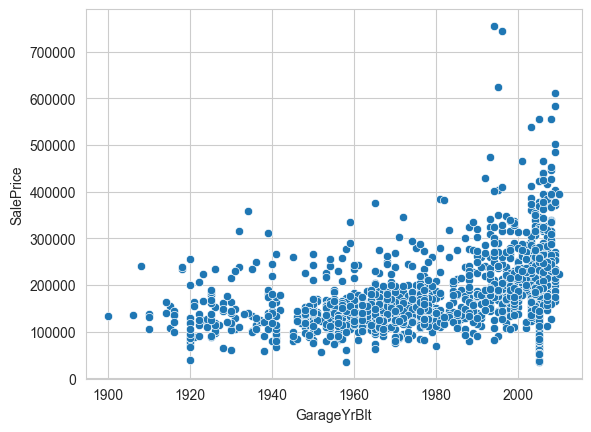

In [21]:
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=df)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

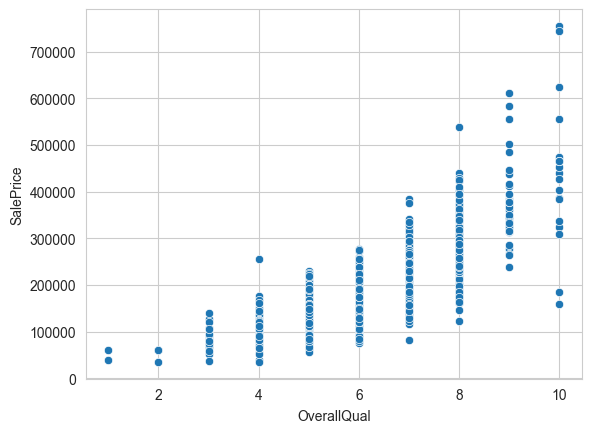

In [22]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

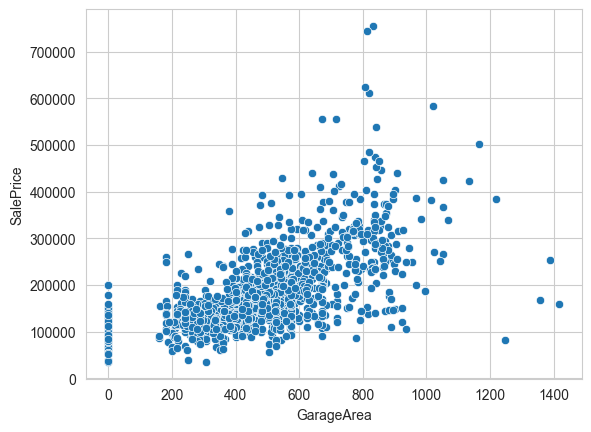

In [23]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

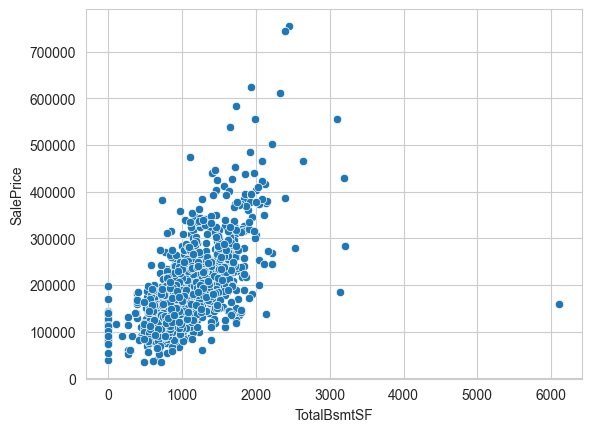

In [24]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

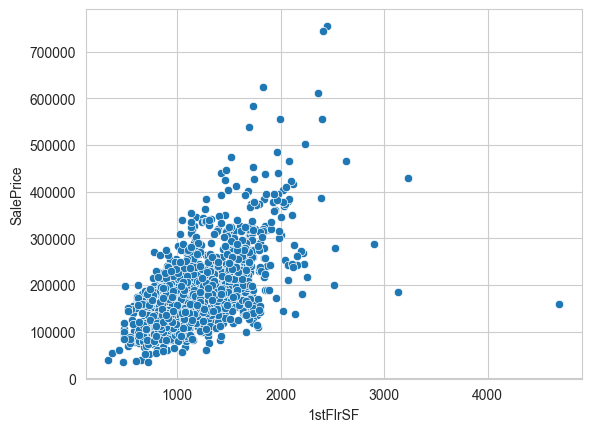

In [25]:
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df)

<Axes: xlabel='2ndFlrSF', ylabel='SalePrice'>

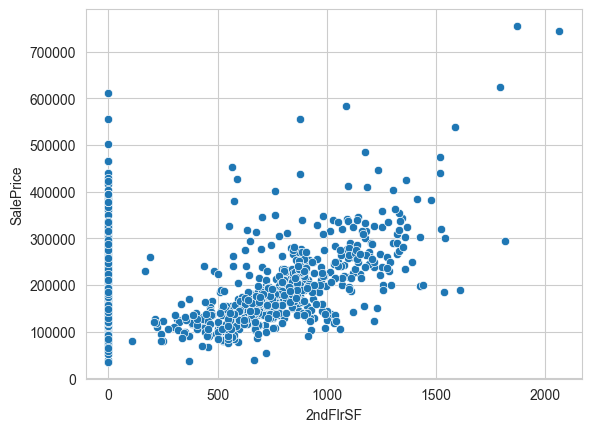

In [26]:
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=df)

In [27]:
df['Total_Area'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'] + df['GarageArea']

<Axes: xlabel='Total_Area', ylabel='SalePrice'>

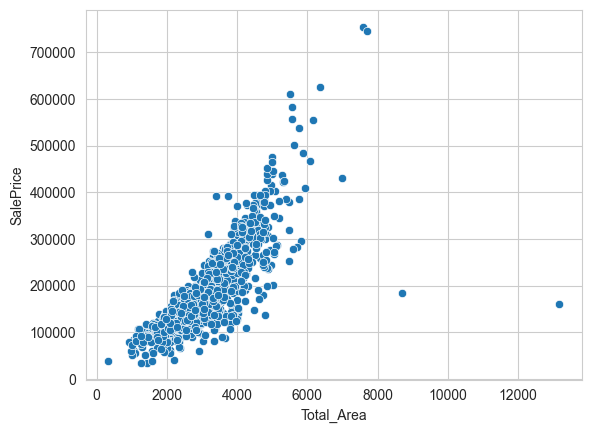

In [28]:
sns.scatterplot(x='Total_Area', y='SalePrice', data=df)

In [29]:
x = df.loc[:, ['GrLivArea', 'Total_Area', 'OverallQual', 'GarageYrBlt']]
y = df[['SalePrice']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

print(f"Data size: {len(x)}\nTraining data size: {len(x_train)}\nTesting data size: {len(x_test)}")

Data size: 1460
Training data size: 1168
Testing data size: 292


In [30]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

print("a = ", model.coef_)
print("b = ",model.intercept_)

a =  [[ 9628.80875051 31480.06715595 33025.41728516  6384.085945  ]]
b =  [181993.42979452]


In [32]:
y_hat = model.predict(x_test_scaled)

In [33]:
error = y_test - y_hat
error

,SalePrice
1283,-41962.058917
537,16490.528487
121,6765.314695
304,-39771.862685
1059,25787.356379
...,...
1184,114.615362
911,2116.287665
991,-50418.583128
825,16665.660545


In [34]:
print("MAE = ", mean_absolute_error(y_test, y_hat))
print("MSE = ", mean_squared_error(y_test, y_hat))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_hat)))

MAE =  22351.514442635413
MSE =  871290971.3228319
RMSE =  29517.638308693193
